# pyMSO4 example 0
Using p2p Ethernet and probe compensation square wave

## Scope configuration
- Connect a probe to channel 1
- Connect the probe to the compensation square wave output (right side of the
scope)
- Press "Autoset" to configure the scope
- Connect the scope to the computer using an Ethernet cable (see manual)

## First steps with pyMSO4
Connect to the scope and get the device information

In [9]:
import pyMSO4
mso44 = pyMSO4.MSO4(trig_type=pyMSO4.MSO4EdgeTrigger)
mso44.con(ip="128.181.240.130") # Using p2p ethernet connection, change with your IP if using a switch
mso44._id_scope()

{'vendor': 'TEKTRONIX',
 'model': 'MSO44',
 'serial': 'C019654',
 'firmware': 'CF:91.1CT FV:2.0.3.950\n'}

## Read current settings
![Autoset](img/ex0_0.png)

In [10]:
print('Enabled channels', [c.enable for c in mso44.ch_a[1:]]) # Channels are 1-indexed
print('Horizontal scale', mso44.acq.horiz_scale, 's/div')
print('Trigger level', mso44.trigger.level, 'V')
print('Trigger type', mso44.trigger._type)
print('Trigger channel', mso44.trigger.source)
print('Edge trigger slope', mso44.trigger.edge_slope)

Enabled channels [True, False, False, False]
Horizontal scale 0.0004 s/div
Trigger level 1.2544 V
Trigger type EDGE
Trigger channel CH1
Edge trigger slope RISE


## Change settings

In [11]:
mso44.ch_a_enable([True, True, False, False]) # Enable channel 1 and 2
print('Enabled channels', [c.enable for c in mso44.ch_a[1:]])

Enabled channels [True, True, False, False]


We now have 2 channels enabled
![Enable channel 2](img/ex0_1.png)

In [12]:
mso44.ch_a[2].enable = False # Disable channel 2
print('Enabled channels', [c.enable for c in mso44.ch_a[1:]])
mso44.acq.horiz_scale = 2e-4 # Set horizontal scale to 200us/div

Enabled channels [True, False, False, False]


Now the signal is more zoomed in
![Reduce the timebase](img/ex0_2.png)

In [13]:
mso44.acq.mode = 'hires' # Enable high resolution mode, notice the resolution on the screen

Notice that the signal is now more detailed
![Set high resolution mode](img/ex0_3.png)

## Acquire a waveform

In [14]:
mso44.acq.wfm_src = ['ch1'] # Set waveform source to channel 1
mso44.acq.wfm_start = 0
mso44.acq.wfm_stop = mso44.acq.horiz_record_length # Get all the data points as displayed on screen
wfm = mso44.sc.query_binary_values('CURVE?', datatype=mso44.acq.get_datatype(), is_big_endian=mso44.acq.is_big_endian)

## Plot

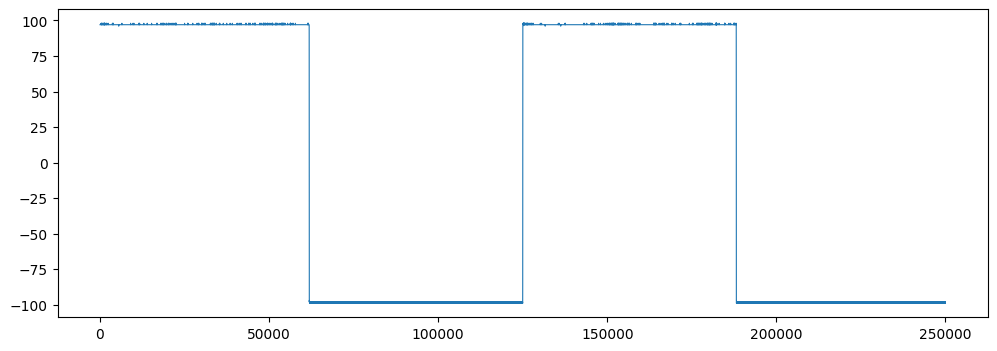

In [15]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 4)
plt.plot(wfm, linewidth=.8)

## Cleanup

In [16]:
mso44.dis()